# 数据来源
ref <https://github.com/fchollet/keras/blob/master/keras/datasets/mnist.py>
```
    f = np.load(path)
    x_train = f['x_train']
    y_train = f['y_train']
    x_test = f['x_test']
    y_test = f['y_test']
    f.close()
```

In [1]:
import numpy as np

f = np.load('./mnist.npz')
x_train = f['x_train']
y_train = f['y_train']
x_test = f['x_test']
y_test = f['y_test']

print x_train[0][0]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


7 (28, 28)
784


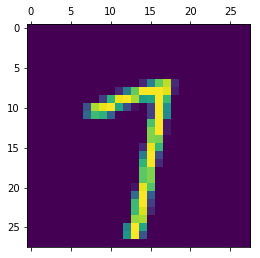

In [53]:
%matplotlib inline

import matplotlib.pyplot as plot

SAMPLE_INDEX= 42

sample_matrix = x_train[SAMPLE_INDEX]

plot.matshow(x_train[SAMPLE_INDEX])
print y_train[SAMPLE_INDEX], sample_matrix.shape

print len( sample_matrix.flatten())


In [129]:
# define the simpleset network

import torch
from torch.autograd import Variable

w = Variable(torch.zeros(784,10),requires_grad=True)   #784 x 10
b = Variable(torch.zeros(1,10), requires_grad=True)

row = sample_matrix[0]

tx  = torch.Tensor([[1 if x>0 else 0 for x in sample_matrix.flatten()]])

def mnist2Var(sample):
    return Variable(torch.Tensor([[1 if x>0 else 0 for x in sample.flatten()]]),requires_grad=False)

def mnist2List(sample):
    return [1 if x>0 else 0 for x in sample.flatten()]

ctriter = torch.nn.MSELoss()

def toExpectVar(num):
    v = np.zeros([1,10])
    v[0][num]= 1
    return v


softmax = torch.nn.Softmax()

batchSize=2
for i in range(10):
    for r in range(10):
        subX =[ mnist2List(data) for data in x_train[i*batchSize:(1+i)*batchSize]]

        subX = Variable(torch.Tensor(subX),requires_grad=False)
        subExpectY  = y_train[i*batchSize:(1+i)*batchSize]


    #     print i,subX.size()
        prey = softmax( torch.mm(subX,w) + b.repeat(batchSize,1) )

        print 'prediect', prey
        
        y = Variable(torch.zeros(1,10))

        subExpectY = [ toExpectVar(y) for y in subExpectY]


        subExpectY = Variable(torch.Tensor(subExpectY),requires_grad=False)

        loss = ctriter(prey,subExpectY)

        loss.backward()

        w.data -= 0.01*w.grad.data
        b.data -= 0.01*b.grad.data

        w.grad.data.zero_()
        b.grad.data.zero_()


#     print loss

result =torch.mm(mnist2Var(x_train[10]),w) + b

print y_train[10]

print result

prediect Variable containing:
 0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000
 0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000  0.1000
[torch.FloatTensor of size 2x10]

prediect Variable containing:
 0.1007  0.0997  0.0997  0.0997  0.0997  0.1014  0.0997  0.0997  0.0997  0.0997
 0.1015  0.0997  0.0997  0.0997  0.0997  0.1007  0.0997  0.0997  0.0997  0.0997
[torch.FloatTensor of size 2x10]

prediect Variable containing:
 0.1015  0.0995  0.0995  0.0995  0.0995  0.1029  0.0995  0.0995  0.0995  0.0995
 0.1030  0.0994  0.0994  0.0994  0.0994  0.1015  0.0994  0.0994  0.0994  0.0994
[torch.FloatTensor of size 2x10]

prediect Variable containing:
 0.1022  0.0992  0.0992  0.0992  0.0992  0.1043  0.0992  0.0992  0.0992  0.0992
 0.1046  0.0991  0.0991  0.0991  0.0991  0.1022  0.0991  0.0991  0.0991  0.0991
[torch.FloatTensor of size 2x10]

prediect Variable containing:
 0.1030  0.0989  0.0989  0.0989  0.0989  0.1058  0.0989  0.0989  0.0989  0

prediect Variable containing:
 0.0995  0.1085  0.1004  0.1009  0.0984  0.1011  0.0965  0.0965  0.0965  0.1019
 0.1005  0.1044  0.1030  0.1028  0.1055  0.1003  0.0942  0.0942  0.0942  0.1011
[torch.FloatTensor of size 2x10]

prediect Variable containing:
 0.0994  0.1092  0.1003  0.1008  0.0986  0.1010  0.0964  0.0964  0.0964  0.1017
 0.1003  0.1045  0.1028  0.1026  0.1067  0.1001  0.0940  0.0940  0.0940  0.1009
[torch.FloatTensor of size 2x10]

prediect Variable containing:
 0.0993  0.1098  0.1002  0.1007  0.0988  0.1008  0.0962  0.0962  0.0962  0.1016
 0.1001  0.1047  0.1026  0.1024  0.1080  0.0999  0.0939  0.0939  0.0939  0.1007
[torch.FloatTensor of size 2x10]

prediect Variable containing:
 0.0992  0.1105  0.1001  0.1005  0.0991  0.1007  0.0961  0.0961  0.0961  0.1015
 0.0999  0.1049  0.1024  0.1022  0.1093  0.0997  0.0937  0.0937  0.0937  0.1005
[torch.FloatTensor of size 2x10]

prediect Variable containing:
 0.0991  0.1112  0.0999  0.1004  0.0993  0.1006  0.0960  0.0960  0.0960  0

prediect Variable containing:
 0.0957  0.1032  0.1064  0.1185  0.0973  0.0998  0.0973  0.0954  0.0926  0.0940
 0.0940  0.1101  0.1006  0.1186  0.0980  0.1013  0.0946  0.0949  0.0935  0.0943
[torch.FloatTensor of size 2x10]

prediect Variable containing:
 0.0955  0.1029  0.1078  0.1181  0.0971  0.0995  0.0971  0.0952  0.0931  0.0938
 0.0939  0.1098  0.1012  0.1182  0.0978  0.1011  0.0944  0.0947  0.0948  0.0941
[torch.FloatTensor of size 2x10]

prediect Variable containing:
 0.0953  0.1026  0.1093  0.1177  0.0969  0.0993  0.0968  0.0950  0.0936  0.0936
 0.0937  0.1095  0.1019  0.1178  0.0976  0.1009  0.0942  0.0945  0.0960  0.0939
[torch.FloatTensor of size 2x10]

prediect Variable containing:
 0.0951  0.1023  0.1108  0.1173  0.0967  0.0990  0.0966  0.0947  0.0941  0.0934
 0.0935  0.1092  0.1025  0.1174  0.0974  0.1006  0.0940  0.0943  0.0973  0.0937
[torch.FloatTensor of size 2x10]

prediect Variable containing:
 0.0948  0.1020  0.1123  0.1169  0.0964  0.0988  0.0964  0.0945  0.0946  0